<a href="https://colab.research.google.com/github/amskyepi/Machine-Learning/blob/master/ML/ML_on_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import seaborn as sns

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(type(iris.data))
iris.data[0:10]

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Classification of data

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
print("Keys: \n {}".format(iris.keys()))

Keys: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
uploaded = files.upload()
irisDF = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

Saving Iris.csv to Iris (1).csv


150 samples, and 6 features

In [ ]:
irisDF.shape

(150, 6)

In [ ]:
irisDF.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
irisFeatures = irisDF.drop(['Species','Id'],axis=1)
display(irisFeatures)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
irisTargets = irisDF['Species']
display(irisTargets)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

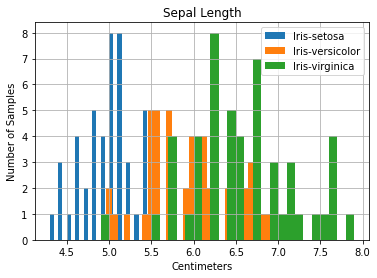

In [ ]:
#Look at a quick histogram of the values in the dataframe for sepal length:

for species in irisTargets.unique():
    plt.figure(1)
    iris_hist = irisFeatures['SepalLengthCm'].iloc[np.where(irisTargets == species)[0]].hist(bins=30)

# Sets title
iris_hist.set_title("Sepal Length")

#=labels
iris_hist.set_xlabel('Centimeters')
iris_hist.set_ylabel('Number of Samples')
iris_hist.legend(irisTargets.unique())

plt.show()

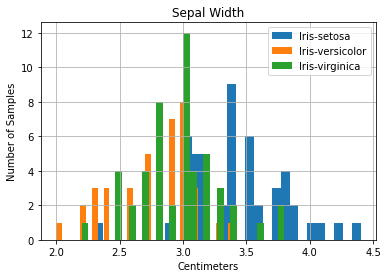

In [ ]:
#Look at a quick histogram of the values in the dataframe for sepal length:
for species in irisTargets.unique():
    plt.figure(1)
    iris_hist = irisFeatures['SepalWidthCm'].iloc[np.where(irisTargets == species)[0]].hist(bins=30)

# Set title
iris_hist.set_title("Sepal Width")

# adding labels
iris_hist.set_xlabel('Centimeters')
iris_hist.set_ylabel('Number of Samples')
iris_hist.legend(irisTargets.unique())

plt.show()

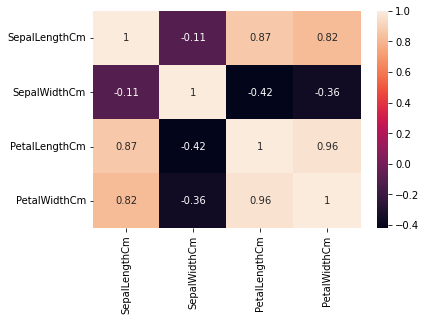

In [ ]:
corrMatrix = irisFeatures.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

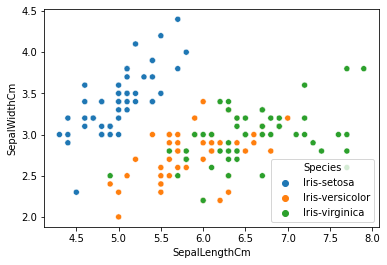

In [ ]:
import seaborn as sns
sns.scatterplot(data=irisDF, x='SepalLengthCm', y='SepalWidthCm', hue=irisDF['Species'])
plt.show()

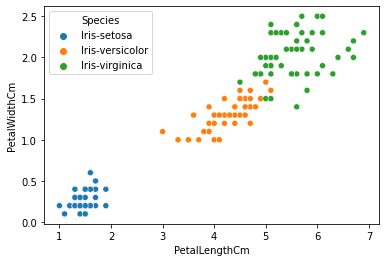

In [ ]:
import seaborn as sns
sns.scatterplot(data=irisDF, x='PetalLengthCm', y='PetalWidthCm', hue=irisDF['Species'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(irisFeatures, irisTargets,
test_size=0.25, random_state=1,shuffle = True, stratify = irisTargets)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [ ]:
print("Test set score: {:.9f}".format(knn.score(X_test, y_test)))

Test set score: 0.973684211


In [ ]:
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
print(irisFeatures.columns)
new_Iris = [[4.5,2.6,1.3,0.4]]

print(new_Iris)
prediction = knn.predict(new_Iris)
print("Prediction: {}".format(prediction))

new_Iris = [[5.0,2.6,5.3,1.9]]

print(new_Iris)
prediction = knn.predict(new_Iris)
print("Prediction: {}".format(prediction))

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
[[4.5, 2.6, 1.3, 0.4]]
Prediction: ['Iris-setosa']
[[5.0, 2.6, 5.3, 1.9]]
Prediction: ['Iris-virginica']
